In [1]:
# objective: generate the particle size structure for the CMIP6 models
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob,os,subprocess
from glob import glob
import IPython.display as display
%matplotlib inline
from datetime import datetime as dt
import seaborn as sns
from matplotlib import ticker as mticker

<h1><center> Mean and Climatology of PFTs, will be done for each model separately </center></h1>

In [2]:
palette_pft = dict(phypico= 'y',phymisc= '#ff7f0e', phycalc= 'c',phydiat= 'g', zmicro= 'b', zmeso= 'r',zooc= 'm')
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='blue')

In [3]:
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

In [4]:
#import data and create dictionary
# create a dictionary with the datasets
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume*.nc')
file_list_biovol_zoo_only = [x for x in file_list_biovol if 'zoo-only' in x]
file_list_biovol_phyto_only = [x for x in file_list_biovol if 'phyto-only' in x]
file_list_biovol = list(set(file_list_biovol).difference(file_list_biovol_zoo_only+file_list_biovol_phyto_only))

file_list_climatology = glob('/work/m1c/CMIP6_biome_PSS_data/*climatology_all*')

file_list_gCarbon = list(set(file_list).difference(file_list_biovol+file_list_climatology))

In [5]:
file_list_biovol

['/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc']

In [6]:
from matplotlib.legend import Legend
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tick
def y_fmt(x, y):
    return '${:1.0e}'.format(x).replace('e', '\\times 10^{') + '}$'

In [7]:
## setting up dictionary of model and PFTs
  
# Creating an empty dictionary
PFT_dict = {}

 
# Adding list as value

PFT_dict['CESM'] = ['phypico', 'phydiat', 'zooc']
PFT_dict['CMCC'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso']
PFT_dict['CNRM'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso']
PFT_dict['GFDL']= ['phypico','phymisc', 'phydiat', 'zmicro', 'zmeso']
PFT_dict['GISS'] = ['phymisc', 'phycalc', 'phydiat', 'zooc']
PFT_dict['IPSL'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso']
PFT_dict['UKESM'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso']

PFT_dict

{'CESM': ['phypico', 'phydiat', 'zooc'],
 'CMCC': ['phymisc', 'phydiat', 'zmicro', 'zmeso'],
 'CNRM': ['phymisc', 'phydiat', 'zmicro', 'zmeso'],
 'GFDL': ['phypico', 'phymisc', 'phydiat', 'zmicro', 'zmeso'],
 'GISS': ['phymisc', 'phycalc', 'phydiat', 'zooc'],
 'IPSL': ['phymisc', 'phydiat', 'zmicro', 'zmeso'],
 'UKESM': ['phymisc', 'phydiat', 'zmicro', 'zmeso']}

In [8]:
PFT_dict[list(PFT_dict.keys())[0]]


['phypico', 'phydiat', 'zooc']

<h1><center> CESM </center></h1>

In [9]:
ds_hist = xr.open_mfdataset([x for x in file_list_biovol if 'GFDL' in x and 'hist' in x][0]).groupby('time.month').mean(dim='time')
ds_hist

<xarray.Dataset>
Dimensions:               (month: 12, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
  * month                 (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/21)
    biomes                (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    chl                   (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    NB                    (month, biovol_um3, lat, lon) float64 dask.array<chunksize=(1, 50, 180, 360), meta=np.ndarray>
    total_biovolume_hist  (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    betas_hist            (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    intercept_hist        (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ...                    ...
    phymisc_per           (month, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    phydiat_per           (month, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zmicro_per            (month, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zmeso_per             (month, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    phyc                  (month, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zooc                  (month, lat, lon) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

In [10]:
df_PFT_all = pd.DataFrame()
for m in list(PFT_dict.keys()):
    print(m)
    print(PFT_dict[m])
    ds_hist = xr.open_mfdataset([x for x in file_list_biovol if m in x and 'hist' in x][0]).groupby('time.month').mean(dim='time')
    ds_ssp5 = xr.open_mfdataset([x for x in file_list_biovol if m in x and 'ssp5' in x][0]).groupby('time.month').mean(dim='time')
    df_PFT = pd.DataFrame()
    for var in PFT_dict[m]: # biomass arrays here
        SH_subset = ds_hist[var].where(ds_hist.lat < 0,drop=True).values # selecting southern hemisphere
        SH_subset = np.roll(SH_subset, shift=6, axis=0) #shift the season occurence by six months (only southern hemispher)
        full_field = ds_hist[var].values #select biomass values for each of the phytoplankton groups
        full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset # from full_field biomass subset, select all months (1st dim), 
        #latitudes from 0 to the lenght of southen hemisphere subset (dim2) and all longitudes
        svar = var #+ '_shift' # 
        ds_hist[svar] = xr.DataArray(full_field, dims=ds_hist[var].dims, coords=ds_hist[var].coords)


    for var in PFT_dict[m]: # biomass arrays here
        SH_subset = ds_ssp5[var].where(ds_ssp5.lat < 0,drop=True).values # selecting southern hemisphere
        SH_subset = np.roll(SH_subset, shift=6, axis=0) #shift the season occurence by six months (only southern hemispher)
        full_field = ds_ssp5[var].values #select biomass values for each of the phytoplankton groups
        full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset # from full_field biomass subset, select all months (1st dim), 
        #latitudes from 0 to the lenght of southen hemisphere subset (dim2) and all longitudes
        svar = var #+ '_shift' # 
        ds_ssp5[svar] = xr.DataArray(full_field, dims=ds_ssp5[var].dims, coords=ds_ssp5[var].coords)

    # dictionary that will be used to generate the dataframe. p refers to the parameter string
    df_list = []
    for p in PFT_dict[m]:
        print(p)
        df_dict={}
        df_dict['ssp5']={}
        df_dict['hist']={}
        

        df_dict['hist']['LC']=dict(zip(ds_hist.month.values.tolist(), ds_hist[p].where(ds_hist.biomes==1).mean(dim=['lat', 'lon']).values.tolist()))
        df_dict['hist']['HCSS']=dict(zip(ds_hist.month.values.tolist(), ds_hist[p].where(ds_hist.biomes==2).mean(dim=['lat', 'lon']).values.tolist()))
        df_dict['hist']['HCPS']=dict(zip(ds_hist.month.values.tolist(), ds_hist[p].where(ds_hist.biomes==3).mean(dim=['lat', 'lon']).values.tolist()))

        df_dict['ssp5']['LC']=dict(zip(ds_ssp5.month.values.tolist(), ds_ssp5[p].where(ds_ssp5.biomes==1).mean(dim=['lat', 'lon']).values.tolist()))
        df_dict['ssp5']['HCSS']=dict(zip(ds_ssp5.month.values.tolist(), ds_ssp5[p].where(ds_ssp5.biomes==2).mean(dim=['lat', 'lon']).values.tolist()))
        df_dict['ssp5']['HCPS']=dict(zip(ds_ssp5.month.values.tolist(), ds_ssp5[p].where(ds_ssp5.biomes==3).mean(dim=['lat', 'lon']).values.tolist()))

        df_dict_flat=[ {**{'experiment': run, 'biomes':biome},**{p:param}} for run, biomes in df_dict.items() for biome, param in biomes.items()]
        df=pd.DataFrame.from_dict(df_dict_flat)
        df_param = df[p].apply(pd.Series)
        df = pd.concat([df.drop([p], axis=1), df_param], axis=1)
        df = pd.melt(df, id_vars=['experiment', 'biomes'], value_vars=ds_ssp5.month.values.tolist(),var_name='month', value_name=p)
        #df=df.explode('NB').reset_index(drop=True)
        df_list.append(df)
   
    df_all = pd.merge(df_list[0], df_list[1],  how='left', on=['experiment','biomes', 'month'])
    df_all = pd.merge(df_all, df_list[2],  how='left', on=['experiment','biomes', 'month'])
    if len(PFT_dict[m])==4:
        df_all = pd.merge(df_all, df_list[3],  how='left', on=['experiment','biomes', 'month'])
    elif len(PFT_dict[m])>4:
        df_all = pd.merge(df_all, df_list[3],  how='left', on=['experiment','biomes', 'month'])
        df_all = pd.merge(df_all, df_list[4],  how='left', on=['experiment','biomes', 'month'])
    df_PFT  = pd.concat([df_PFT , df_all]).reset_index(drop=True)
    df_PFT  =df_PFT.melt(id_vars=['experiment','biomes', 'month'], value_vars=PFT_dict[m],var_name='PFT', value_name='biovolume')
    print(df_PFT.head())
    df_PFT['source']  = m
    df_PFT['log_biovol']= np.log10(df_PFT['biovolume'])
    df_PFT_all = pd.concat([df_PFT_all , df_PFT]).reset_index(drop=True)
    
   


df_PFT_all.to_csv('/work/m1c/CMIP6_biome_PSS_data/df_PFT_all_models.csv', sep= ',', index = False)
df_PFT_all

CESM
['phypico', 'phydiat', 'zooc']
phypico
phydiat
zooc
  experiment biomes month      PFT     biovolume
0       ssp5     LC     1  phypico  1.297715e+14
1       ssp5   HCSS     1  phypico  2.720272e+13
2       ssp5   HCPS     1  phypico  1.136501e+14
3       hist     LC     1  phypico  1.355588e+14
4       hist   HCSS     1  phypico  3.187225e+13
CMCC
['phymisc', 'phydiat', 'zmicro', 'zmeso']
phymisc
phydiat
zmicro
zmeso
  experiment biomes month      PFT     biovolume
0       ssp5     LC     1  phymisc  7.672921e+13
1       ssp5   HCSS     1  phymisc  3.321453e+13
2       ssp5   HCPS     1  phymisc  8.751154e+13
3       hist     LC     1  phymisc  8.424601e+13
4       hist   HCSS     1  phymisc  3.273972e+13
CNRM
['phymisc', 'phydiat', 'zmicro', 'zmeso']
phymisc
phydiat
zmicro
zmeso
  experiment biomes month      PFT     biovolume
0       ssp5     LC     1  phymisc  6.713261e+14
1       ssp5   HCSS     1  phymisc  3.306906e+14
2       ssp5   HCPS     1  phymisc  6.082911e+14
3      

,experiment,biomes,month,PFT,biovolume,source,log_biovol
0,ssp5,LC,1,phypico,1.297715e+14,CESM,14.113179
1,ssp5,HCSS,1,phypico,2.720272e+13,CESM,13.434612
2,ssp5,HCPS,1,phypico,1.136501e+14,CESM,14.055570
3,hist,LC,1,phypico,1.355588e+14,CESM,14.132128
4,hist,HCSS,1,phypico,3.187225e+13,CESM,13.503413
...,...,...,...,...,...,...,...
2011,ssp5,HCSS,12,zmeso,1.415387e+13,UKESM,13.150875
2012,ssp5,HCPS,12,zmeso,4.252697e+13,UKESM,13.628664
2013,hist,LC,12,zmeso,1.052314e+13,UKESM,13.022145
2014,hist,HCSS,12,zmeso,1.507091e+13,UKESM,13.178139


In [11]:
ds_hist

<xarray.Dataset>
Dimensions:               (month: 12, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 5.316 8.041 ... 3.408e+09
  * month                 (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/19)
    biomes                (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    chl                   (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    NB                    (month, biovol_um3, lat, lon) float64 dask.array<chunksize=(1, 50, 180, 360), meta=np.ndarray>
    total_biovolume_hist  (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    betas_hist            (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    intercept_hist        (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    ...                    ...
    phymisc_per           (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    phydiat_per           (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zmicro_per            (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zmeso_per             (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    phyc                  (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    zooc                  (month, lat, lon) float64 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

In [12]:
for m in list(PFT_dict.keys()):
    print(m)
    print(df_PFT_all.loc[df_PFT_all.source==m].PFT.unique())

CESM
['phypico' 'phydiat' 'zooc']
CMCC
['phymisc' 'phydiat' 'zmicro' 'zmeso']
CNRM
['phymisc' 'phydiat' 'zmicro' 'zmeso']
GFDL
['phypico' 'phymisc' 'phydiat' 'zmicro' 'zmeso']
GISS
['phymisc' 'phycalc' 'phydiat' 'zooc']
IPSL
['phymisc' 'phydiat' 'zmicro' 'zmeso']
UKESM
['phymisc' 'phydiat' 'zmicro' 'zmeso']


In [13]:
np.nanmean(df_PFT_all.loc[(df_PFT_all.source=='GISS') & (df_PFT_all.PFT=='phymisc')].biovolume)

220064574997699.06

In [14]:
np.nanmean(df_PFT_all.loc[(df_PFT_all.source=='GISS') & (df_PFT_all.PFT=='phycalc')].biovolume)

1.5389803951460595e+17

In [15]:
df_diff = df_PFT_all.pivot(index = ['biomes', 'month', 'PFT', 'source'], columns = 'experiment', values = 'log_biovol').reset_index().rename_axis(None, axis=1)
df_diff['diff'] = df_diff['ssp5']- df_diff['hist']
df_diff['per_diff'] = (df_diff['ssp5']- df_diff['hist'])/(df_diff.iloc[:, 4:5].mean(axis=1))
df_diff

,biomes,month,PFT,source,hist,ssp5,diff,per_diff
0,HCPS,1,phycalc,GISS,17.362983,17.382286,0.019303,0.001112
1,HCPS,1,phydiat,CESM,14.893509,14.809914,-0.083595,-0.005613
2,HCPS,1,phydiat,CMCC,14.539521,14.518000,-0.021521,-0.001480
3,HCPS,1,phydiat,CNRM,16.197729,16.182770,-0.014959,-0.000924
4,HCPS,1,phydiat,GFDL,16.121115,16.068309,-0.052805,-0.003276
...,...,...,...,...,...,...,...,...
1003,LC,12,zmicro,GFDL,13.937200,13.891978,-0.045222,-0.003245
1004,LC,12,zmicro,IPSL,12.773246,12.762978,-0.010267,-0.000804
1005,LC,12,zmicro,UKESM,12.804892,12.775345,-0.029547,-0.002308
1006,LC,12,zooc,CESM,13.702027,13.662465,-0.039562,-0.002887


In [16]:
letters = ['a.','b.','c.','d.','e.','f.','g.','h.','i.','j.','k.','l.','m.','n.','o.','p.','q.','r.','s.','t.' ,'u.','v.','w.','x.', 'y.', 'z.','aa.','ab.','ac.','ad.','ae.','af.','ag.','ah.','ai.']

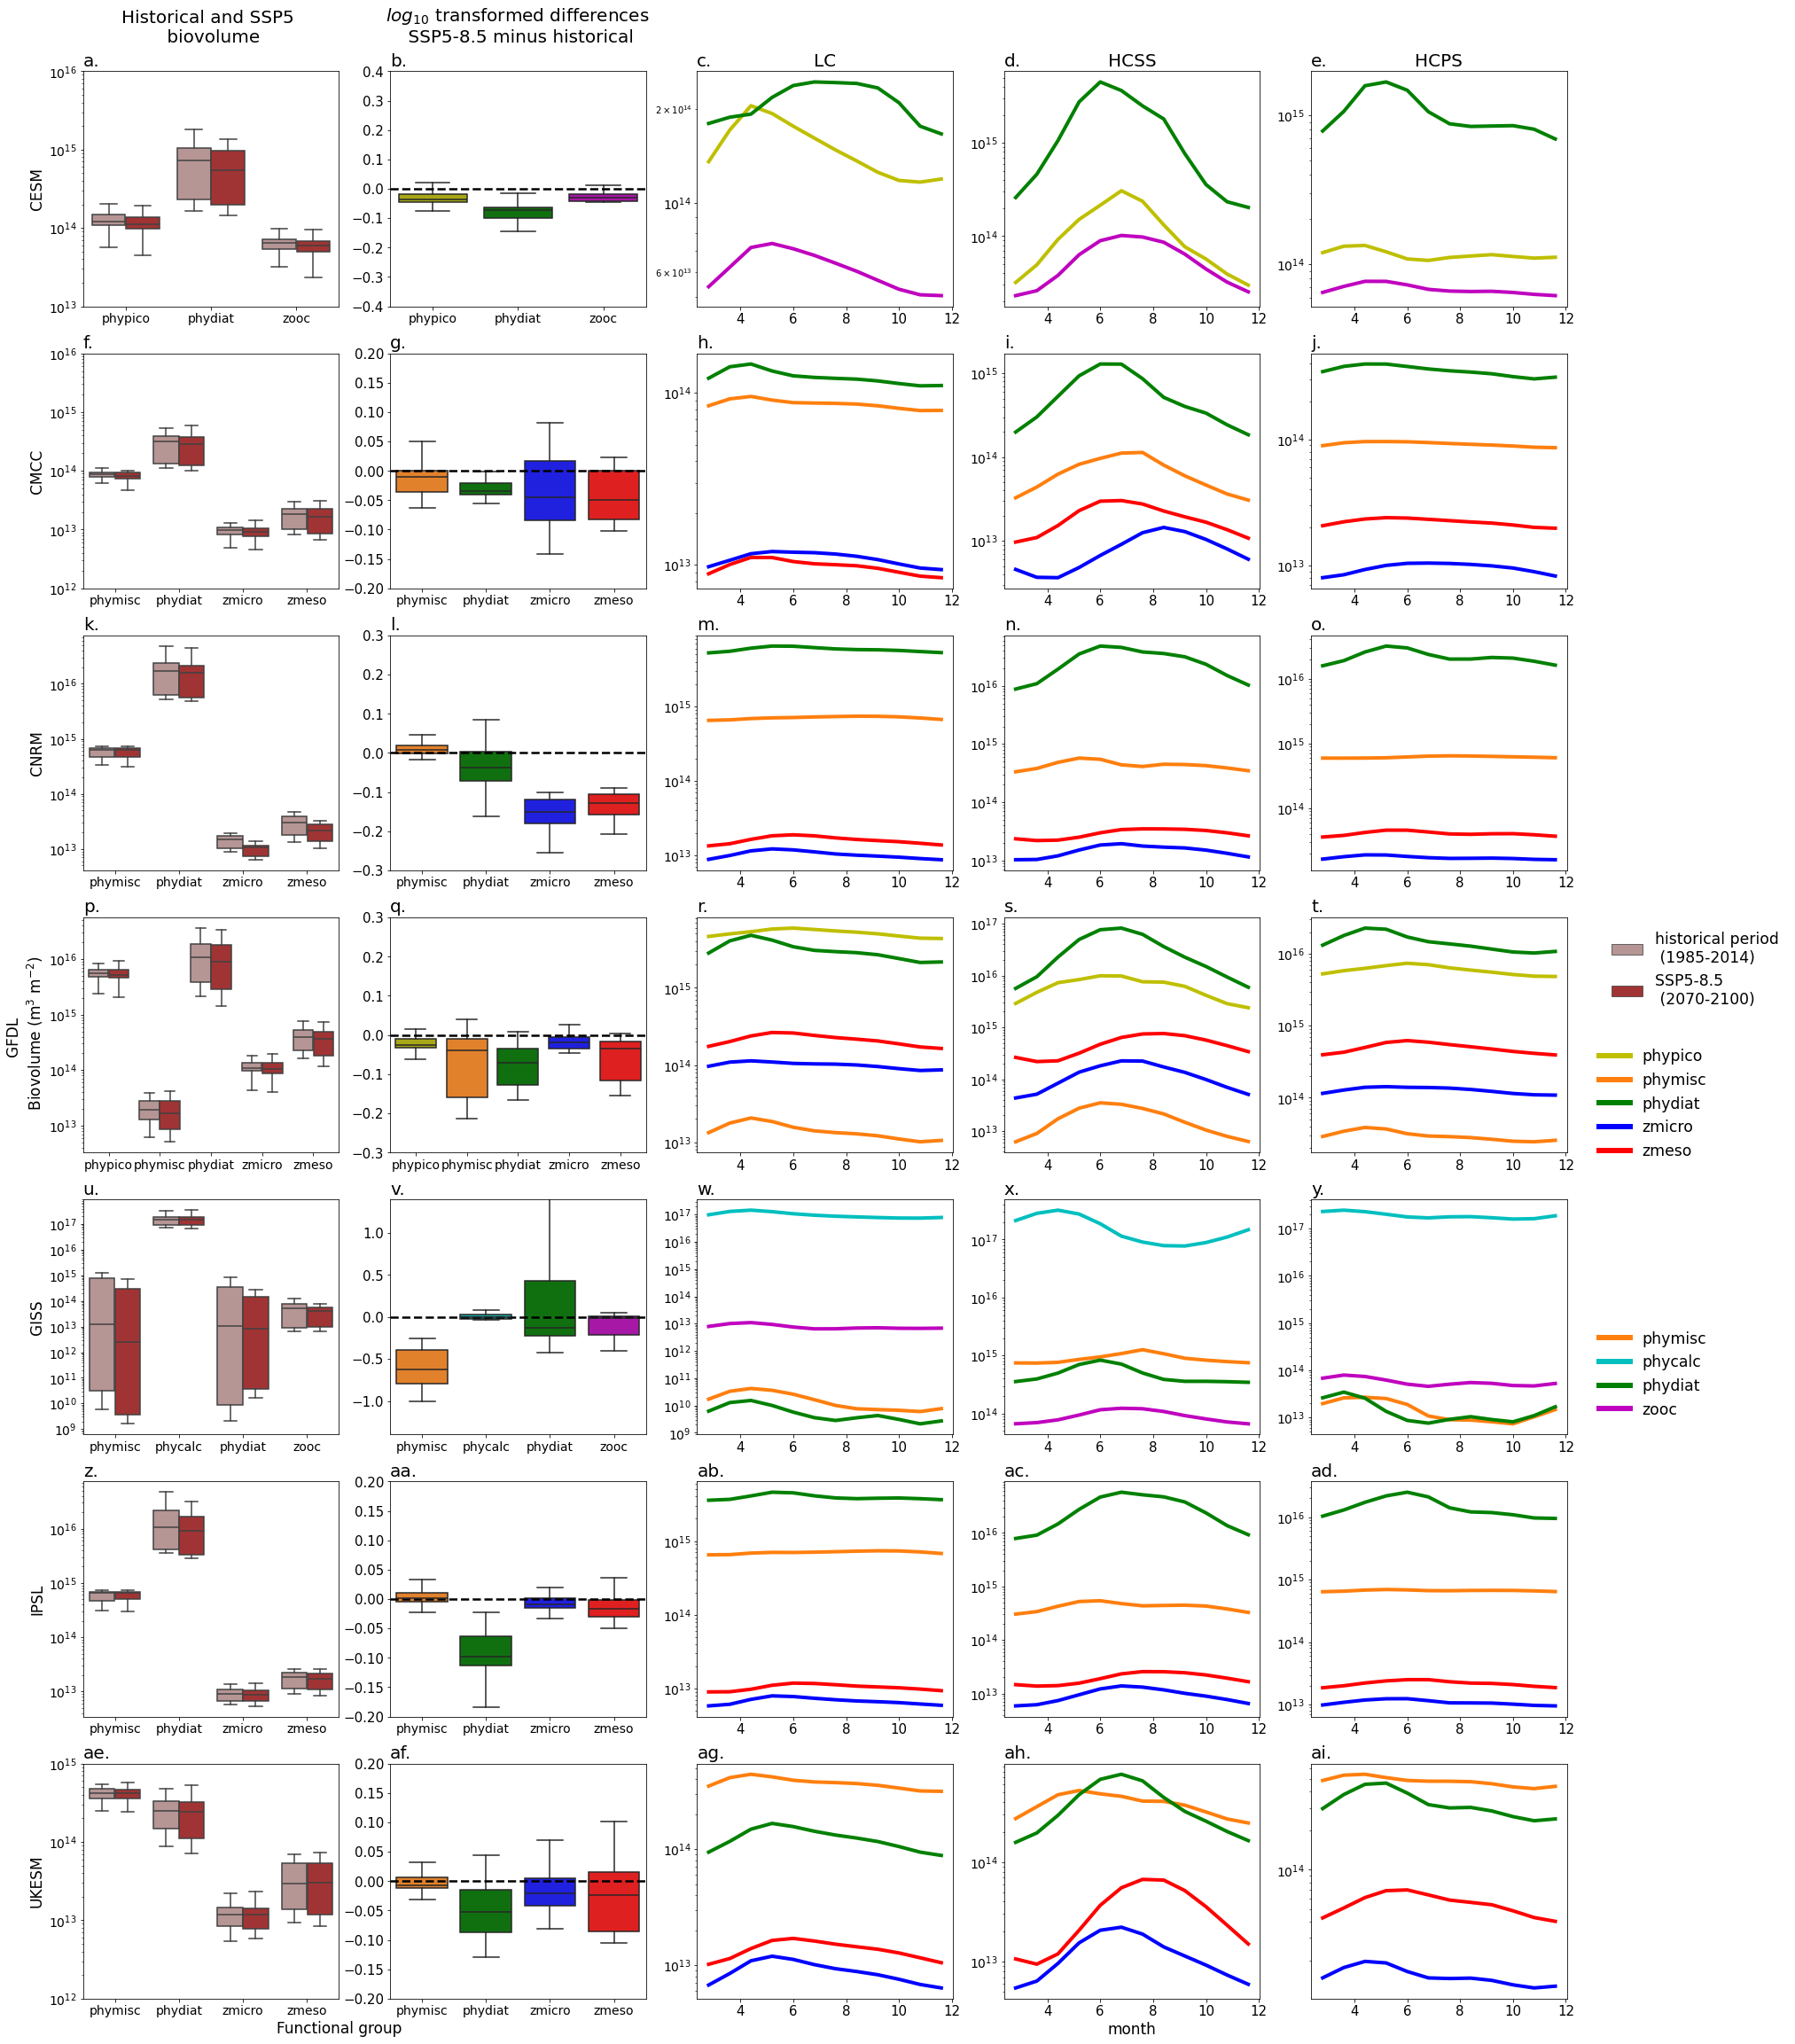

In [17]:
biomes = ['','', 'LC', 'HCSS', 'HCPS']
ind=0
fig, ax_n = plt.subplots(nrows=7, ncols=5, figsize=(30,40))
for r, m in enumerate(list(PFT_dict.keys())):
    for c,b  in enumerate(biomes):
        ind +=1
        ax_n[r,c].set_title(letters[ind-1], loc='left', fontsize=20)
        if c==0:
            sns.boxplot(ax = ax_n[r,c], x = 'PFT', y='biovolume', order = PFT_dict[m], hue = 'experiment', hue_order=['hist', 'ssp5'], palette=palette_experiments, data=df_PFT_all.loc[df_PFT_all.source==m], showfliers=False)
            ax_n[r,c].tick_params(axis='both', which='major', labelsize=14)


            #ax_n[r,c].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
            #ymin, ymax = ax_n[r,c].get_ylim()
            #tick_range = np.arange(np.floor(ymin), ymax)
            #ax_n[r,c].yaxis.set_ticks(tick_range)
            ax_n[r,c].set_yscale('log')

            ax_n[r,c].tick_params(axis='y', which='major', labelsize=14)
            ax_n[r,c].set_xlabel('')
            if m=='CESM':
                ax_n[r,c].set_ylim([1e13, 1e16])
            elif m=='CMCC':
                ax_n[r,c].set_ylim([1e12, 1e16])
            elif m=='UKESM':
                ax_n[r,c].set_ylim([1e12, 1e15])
            if r==3:
                L = ax_n[r,c].legend(title='', fontsize = 'xx-large',  markerscale=10, frameon=False, bbox_to_anchor=(6.7, 1))
                L.get_texts()[0].set_text('historical period \n (1985-2014)')
                L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
                
            else:
                ax_n[r,c].get_legend().remove()
        elif c==1:
            sns.boxplot(ax = ax_n[r,c], x = 'PFT', y='diff', order = PFT_dict[m], palette=palette_pft, data=df_diff.loc[df_diff.source==m], showfliers=False)
            ax_n[r,c].tick_params(axis='both', which='major', labelsize=14)

            
            #ax_n[r,c].set_yscale('log')
            ax_n[r,c].axhline(0, ls='--', color = 'k', linewidth = 2.5)
            ax_n[r,c].tick_params(axis='y', which='major', labelsize=15)
            ax_n[r,c].set_xlabel('')
            if m=='CESM':
                ax_n[r,c].set_ylim([-0.4, 0.4])
            elif m=='CMCC':
                ax_n[r,c].set_ylim([-0.2, 0.2])
            elif m=='CNRM':
                ax_n[r,c].set_ylim([-0.3, 0.3])
            if m=='GFDL':
                ax_n[r,c].set_ylim([-0.3, 0.3])
            if m=='GISS':
                ax_n[r,c].set_ylim([-1.4, 1.4])
            elif m=='IPSL':
                ax_n[r,c].set_ylim([-0.2, 0.2])
            elif m=='UKESM':
                ax_n[r,c].set_ylim([-0.2, 0.2])
            #ax_n[r,c].set_ylim([-0.01, 0.01])# use this limit for the percentages
            #ax_n[r,c].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
            #ymin, ymax = ax_n[r,c].get_ylim()
            #tick_range = np.arange(np.floor(ymin), ymax)
            #ax_n[r,c].yaxis.set_ticks(tick_range)


        else:
            sns.lineplot(ax = ax_n[r,c],x = 'month', y='biovolume', hue = 'PFT',palette=palette_pft, linewidth = 4, data=df_PFT_all.loc[(df_PFT_all.biomes==b) & (df_PFT_all.source==m) & (df_PFT_all.experiment=='hist')], ci=None)
            ax_n[r,c].tick_params(axis='both', which='major', labelsize=16)
            #ax[n].set_ylim([0, 4e15])
            
            #ax_n[r,c].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
            #ymin, ymax = ax_n[r,c].get_ylim()
            #tick_range = np.arange(np.floor(ymin), ymax)
            #ax_n[r,c].yaxis.set_ticks(tick_range)
            ax_n[r,c].set_yscale('log')
            ax_n[r,c].tick_params(axis='y', which='major', labelsize=14)
            ax_n[r,c].set_xlabel('')
            #ax_n[r,c].xaxis.set_major_locator(plt.MaxNLocator(6))
            ax_n[r,c].set_xticklabels([2,4,6,8,10,12], fontsize=15)
            if c==3:
                if r ==3 or r==4:
                    L = ax_n[r,c].legend(title='', fontsize = 'xx-large',  markerscale=10, frameon=False, bbox_to_anchor=(2.8, 0.5))
                    for line in L.get_lines():
                        line.set_linewidth(6)
                else:
                    ax_n[r,c].get_legend().remove()
            else:
                ax_n[r,c].get_legend().remove()
                
        if r==0:
            if c==0:
                ax_n[r,c].set_title('Historical and SSP5 \n biovolume', y= 1.1,fontsize=20)
            elif c==1:
                ax_n[r,c].set_title('$log_{10}$ transformed differences \n SSP5-8.5 minus historical', y= 1.1,fontsize=20)
            elif c==2 or c==3 or c==4:
                ax_n[r,c].set_title(b, y= 1,fontsize=20)
        if c==0:
            if r ==3:
                ax_n[r,c].set_ylabel('GFDL \n Biovolume (m$^{3}$ m$^{-2}$)', fontsize = 17)
            else:
                ax_n[r,c].set_ylabel(m, fontsize = 17)
        else:
            ax_n[r,c].set_ylabel('')
        #if r==0 and c==2:
            #ax_n[r,c].set_title('CESM \n LC', y= 1,fontsize=20)
        if r==6:
            if c==0:
                ax_n[r,c].set_xlabel('Functional group', x=1, fontsize = 17)
            elif c==3:
                ax_n[r,c].set_xlabel('month', fontsize = 17)
        #ax_n[r,c].yaxis.set_minor_locator(plt.MaxNLocator(6))
            
            
plt.tight_layout()         
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_supp_PFTS_biovolume.pdf', dpi=300)            

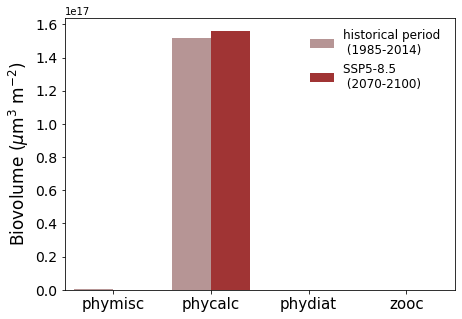

In [18]:
fig, ax = plt.subplots( figsize=(7,5))
sns.barplot(ax = ax, x = 'PFT', y='biovolume', order = PFT_dict['GISS'], hue = 'experiment', hue_order=['hist', 'ssp5'], palette=palette_experiments, data=df_PFT_all.loc[df_PFT_all.source=='GISS'], errorbar=None)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 17)
#ax.get_yaxis().set_major_formatter(plt.LogFormatter(10,  labelOnlyBase=False))
#ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
#ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.tick_params(axis='y', which='major', labelsize=14)
L = ax.legend(title='', fontsize = 'large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))

L.get_texts()[0].set_text('historical period \n (1985-2014)')
L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')

ax.set_xlabel('')


#L = ax_n.legend(title='', fontsize = 'xx-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
#for bars, hatch, legend_handle in zip(ax.containers, ['', '//'], ax.legend_.legendHandles):
     #for bar, color in zip(bars, palette):
         #bar.set_facecolor(color)
         #bar.set_hatch(hatch)
     # update the existing legend, use twice the hatching pattern to make it denser
     #legend_handle.set_hatch(hatch + hatch)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/panel_CESM_PFT_experiments.pdf', dpi=300)

# percentage of PFTs related to slope

In [19]:
## setting up dictionary of model and PFTs
  
# Creating an empty dictionary
PFT_dict = {}

 
# Adding list as value

PFT_dict['CESM'] = ['phypico', 'phydiat', 'zooc', 'total_biovolume_full']
PFT_dict['CMCC'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
PFT_dict['CNRM'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
PFT_dict['GFDL']= ['phypico','phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
PFT_dict['GISS'] = ['phymisc', 'phycalc', 'phydiat', 'zooc', 'total_biovolume_full']
PFT_dict['IPSL'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
PFT_dict['UKESM'] = ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']

PFT_dict

{'CESM': ['phypico', 'phydiat', 'zooc', 'total_biovolume_full'],
 'CMCC': ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full'],
 'CNRM': ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full'],
 'GFDL': ['phypico',
  'phymisc',
  'phydiat',
  'zmicro',
  'zmeso',
  'total_biovolume_full'],
 'GISS': ['phymisc', 'phycalc', 'phydiat', 'zooc', 'total_biovolume_full'],
 'IPSL': ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full'],
 'UKESM': ['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']}

In [20]:
df_PFT_all = pd.DataFrame()
for m in list(PFT_dict.keys()):
    print(m)
    print(PFT_dict[m])
    df_PFT = pd.DataFrame()
    ds_hist = xr.open_mfdataset([x for x in file_list_biovol if m in x and 'hist' in x][0]).mean(dim=['time',  'lat', 'lon',])
    ds_hist = ds_hist.to_dataframe().reset_index()
    ds_hist['source'] = m
    ds_hist['experiment'] = 'historical'
    ds_hist.columns = ds_hist.columns.str.removesuffix('_hist')
    #for i in PFT_dict[m]:
       #ds_hist[i] = ds_hist[i]*1e-15 
    ds_ssp5 = xr.open_mfdataset([x for x in file_list_biovol if m in x and 'ssp5' in x][0]).mean(dim=['time', 'lat', 'lon'])
    ds_ssp5 = ds_ssp5.to_dataframe().reset_index()
    ds_ssp5['source'] = m
    ds_ssp5['experiment'] = 'ssp5'
    ds_ssp5.columns = ds_ssp5.columns.str.removesuffix('_ssp5')
    #for i in PFT_dict[m]:
       #ds_ssp5[i] = ds_ssp5[i]*1e-15 
    df_PFT = pd.concat([ds_hist,ds_ssp5], axis=0, ignore_index=True)
    df_PFT_all =  pd.concat([df_PFT_all,df_PFT], axis=0, ignore_index=True)
df_PFT_all = df_PFT_all[['source','experiment','betas','phypico_per', 'phycalc_per', 'phymisc_per', 'phydiat_per', 'zmicro_per', 'zmeso_per', 'zooc_per']].drop_duplicates()
df_PFT_all.to_csv('/work/m1c/CMIP6_biome_PSS_data/df_PFT_percentages.csv', sep= ',', index = False)

CESM
['phypico', 'phydiat', 'zooc', 'total_biovolume_full']
CMCC
['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
CNRM
['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
GFDL
['phypico', 'phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
GISS
['phymisc', 'phycalc', 'phydiat', 'zooc', 'total_biovolume_full']
IPSL
['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']
UKESM
['phymisc', 'phydiat', 'zmicro', 'zmeso', 'total_biovolume_full']


In [21]:
df_PFT_all

,source,experiment,betas,phypico_per,phycalc_per,phymisc_per,phydiat_per,zmicro_per,zmeso_per,zooc_per
0,CESM,historical,-1.034678,22.668031,NaN,NaN,64.876855,NaN,NaN,12.455114
50,CESM,ssp5,-1.025237,23.957480,NaN,NaN,63.276490,NaN,NaN,12.766030
100,CMCC,historical,-1.142250,NaN,NaN,25.347713,64.825682,5.413658,4.412948,NaN
150,CMCC,ssp5,-1.154768,NaN,NaN,27.885939,62.930751,4.978192,4.205118,NaN
200,CNRM,historical,-1.245333,NaN,NaN,7.200390,92.411707,0.134854,0.253049,NaN
250,CNRM,ssp5,-1.263835,NaN,NaN,8.406275,91.271351,0.110589,0.211785,NaN
300,GFDL,historical,-1.145204,42.322063,NaN,0.106259,50.182270,0.902266,6.487184,NaN
350,GFDL,ssp5,-1.151638,47.592537,NaN,0.094877,45.136017,1.038308,6.138202,NaN
400,GISS,historical,-1.613327,NaN,76.795251,11.677818,10.226807,NaN,NaN,1.300123
450,GISS,ssp5,-1.651846,NaN,80.110083,11.009425,7.918606,NaN,NaN,0.961886
